In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa_players.csv')
df['id'] = df.index
df.set_index('id', inplace=True)
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
id,,,,,,,,,,,,,,,,,,,,,
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null  obje

# Loại bỏ cột không cần thiết

In [4]:
df.drop(['name', 'full_name', 'birth_date'], axis=1, inplace=True)

# Check giá trị khuyết thiếu (Missing values)

<Axes: >

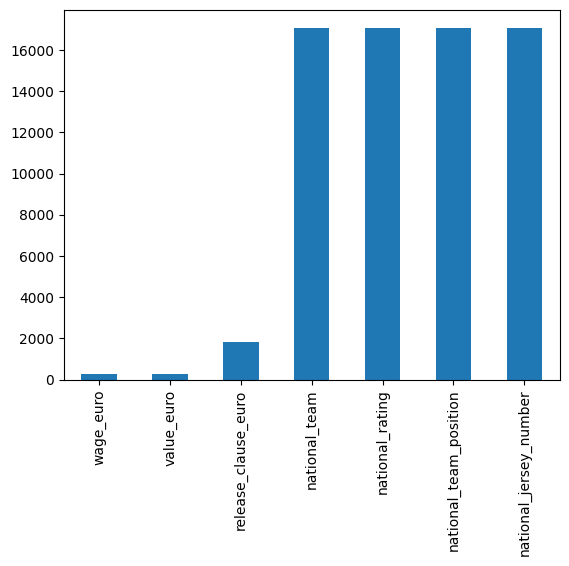

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()

In [6]:
df.drop(['national_team', 'national_team_position','national_rating', 
         'national_jersey_number'], axis=1, inplace=True)

In [7]:
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()

value_euro              255
wage_euro               246
release_clause_euro    1837
dtype: int64

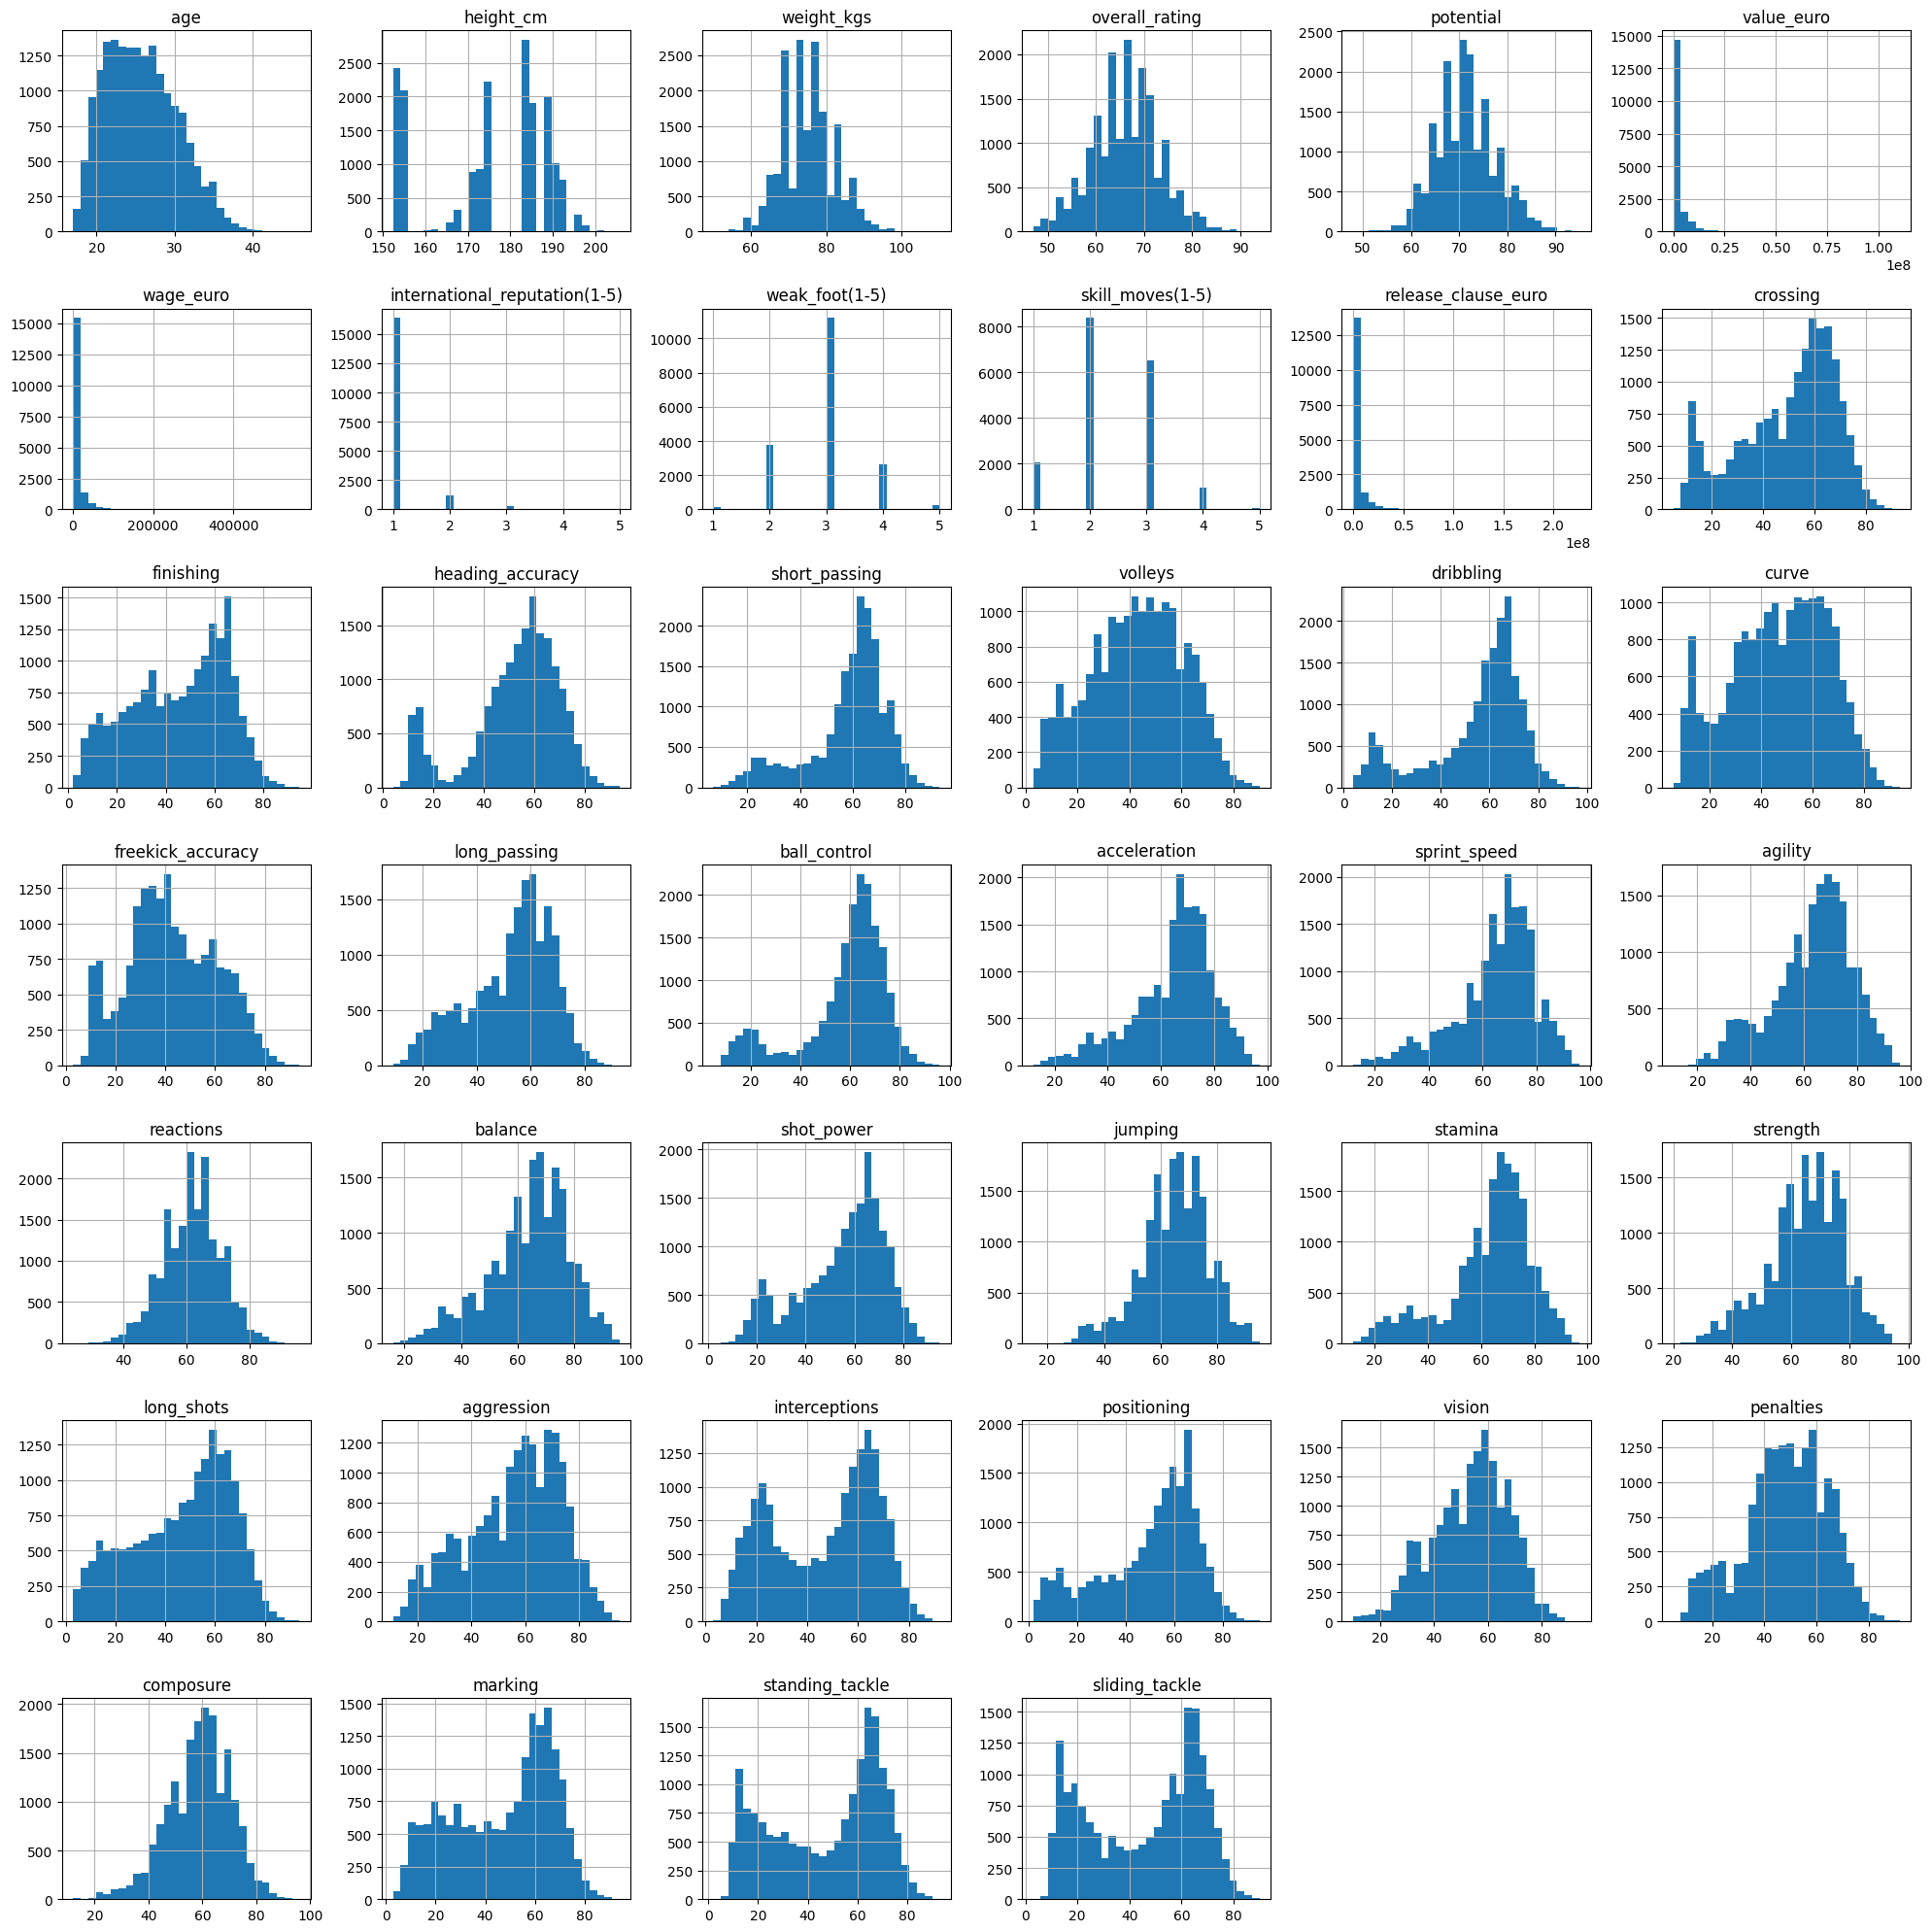

In [8]:
df.hist(bins=30, figsize=(20,20))
plt.tight_layout()
plt.show()

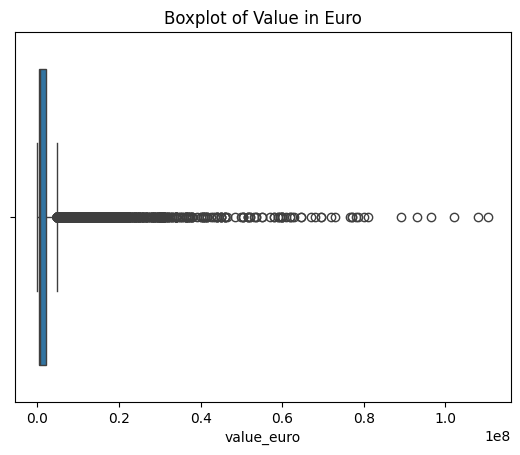

In [9]:
sns.boxplot(x=df['value_euro'])
plt.title('Boxplot of Value in Euro')
plt.show()

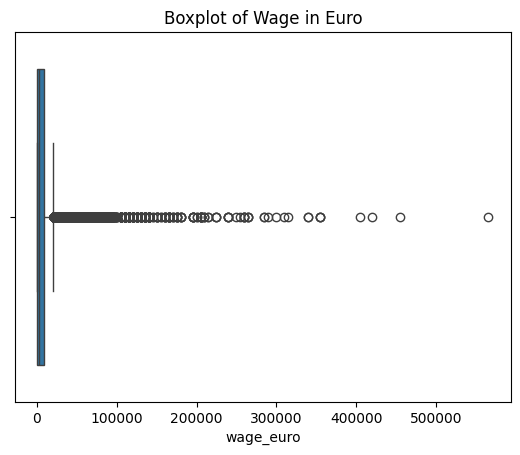

In [10]:
sns.boxplot(x=df['wage_euro'])
plt.title('Boxplot of Wage in Euro')
plt.show()

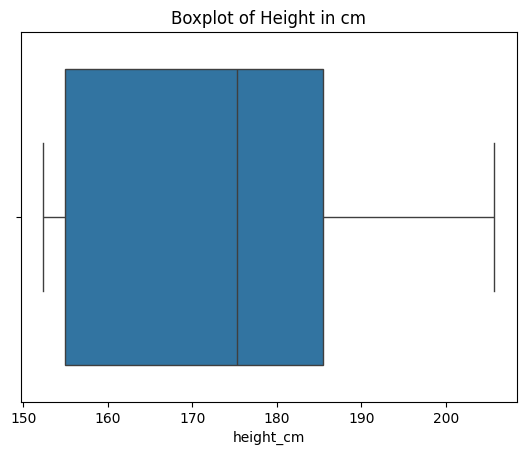

In [11]:
sns.boxplot(x=df['height_cm'])
plt.title('Boxplot of Height in cm')
plt.show()

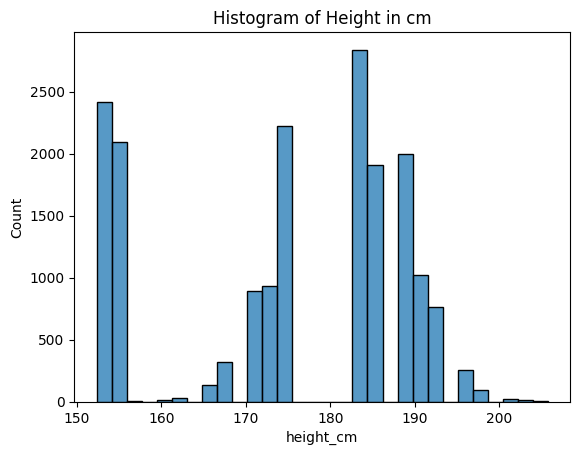

In [12]:
sns.histplot(df['height_cm'], bins=30)
plt.title('Histogram of Height in cm')
plt.show()

In [13]:
height_outliers = df[df['height_cm'] <= 160]
height_outliers = height_outliers[['height_cm']]
height_outliers

,height_cm
id,
1,154.94
6,152.40
15,152.40
17,152.40
29,154.94
...,...
17906,154.94
17910,154.94
17926,154.94


In [14]:
df.loc[df['height_cm'] <= 160, 'height_cm'] = np.nan

In [15]:
df.isnull().sum().sort_values(ascending=False)

height_cm                        4515
release_clause_euro              1837
value_euro                        255
wage_euro                         246
positions                           0
weight_kgs                          0
overall_rating                      0
nationality                         0
potential                           0
preferred_foot                      0
international_reputation(1-5)       0
age                                 0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
body_type                           0
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys                             0
dribbling                           0
curve                               0
freekick_accuracy                   0
long_passing                        0
ball_control                        0
acceleration                        0
sprint_speed

# Miss Forest

In [16]:
from missforest import MissForest

imputer = MissForest()

# Select the columns with missing values
columns_to_impute = ['value_euro', 'height_cm', 'wage_euro', 'release_clause_euro']

# Impute the missing values using MissForest
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify that there are no more missing values in the specified columns
df[columns_to_impute].isnull().sum()

100%|██████████| 5/5 [00:01<00:00,  4.73it/s]


value_euro             0
height_cm              0
wage_euro              0
release_clause_euro    0
dtype: int64

# Chuẩn hoá log (ko tot lam)

In [48]:
# Đảm bảo rằng các giá trị không có giá trị âm hoặc bằng 0 để tránh lỗi khi tính log
df['value_euro'] = df['value_euro'].apply(lambda x: x if x > 0 else 1)
df['wage_euro'] = df['wage_euro'].apply(lambda x: x if x > 0 else 1)
df['release_clause_euro'] = df['release_clause_euro'].apply(lambda x: x if x > 0 else 1)

# Chuẩn hóa log cho các cột
# Sử dụng log1p (tương đương với log(1 + x)) để tránh vấn đề với giá trị 0
df['value_euro_log'] = np.log1p(df['value_euro'])
df['wage_euro_log'] = np.log1p(df['wage_euro'])
df['release_clause_euro_log'] = np.log1p(df['release_clause_euro'])

# Kiểm tra kết quả
df[['value_euro', 'value_euro_log', 'wage_euro', 'wage_euro_log', 'release_clause_euro', 'release_clause_euro_log']].head()


,value_euro,value_euro_log,wage_euro,wage_euro_log,release_clause_euro,release_clause_euro_log
id,,,,,,
1,69500000.0,18.056837,205000.0,12.230770,133800000.0,18.711857
2,73000000.0,18.105970,255000.0,12.449023,144200000.0,18.786712
3,62000000.0,17.942645,165000.0,12.013707,105400000.0,18.473273
4,60000000.0,17.909855,135000.0,11.813037,106500000.0,18.483656
5,59500000.0,17.901487,215000.0,12.278398,114500000.0,18.556085


In [49]:
df.drop(['value_euro', 'wage_euro', 'release_clause_euro'], axis=1, inplace=True)

In [50]:
df.rename(columns={'value_euro_log': 'value_euro', 'wage_euro_log': 'wage_euro',
                     'release_clause_euro_log': 'release_clause_euro'}, inplace=True)

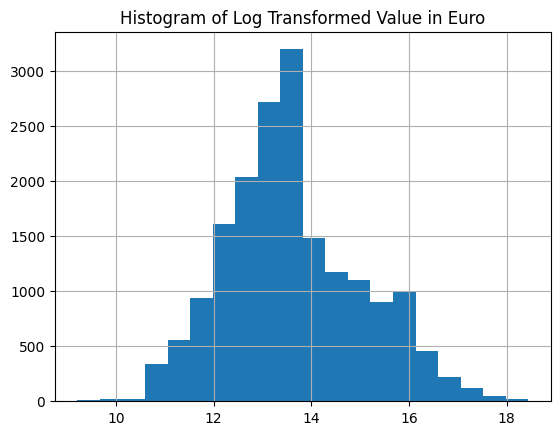

In [51]:
df['value_euro'].hist(bins=20)
plt.title('Histogram of Log Transformed Value in Euro')
plt.show()

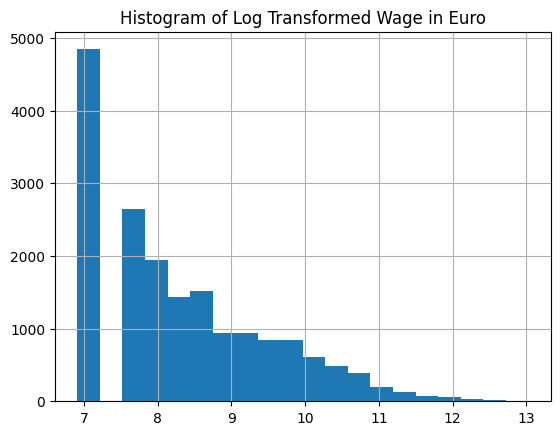

In [52]:
df['wage_euro'].hist(bins=20)
plt.title('Histogram of Log Transformed Wage in Euro')
plt.show()

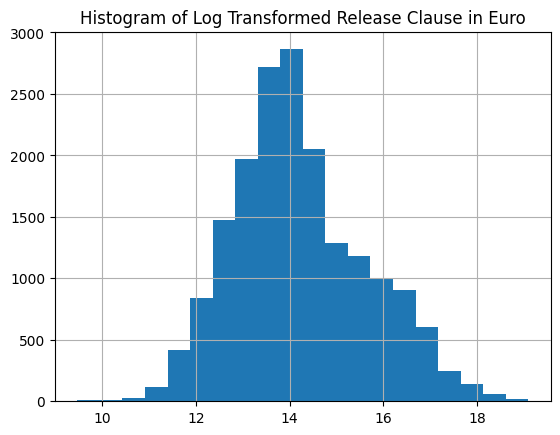

In [53]:
df['release_clause_euro'].hist(bins=20)
plt.title('Histogram of Log Transformed Release Clause in Euro')
plt.show()

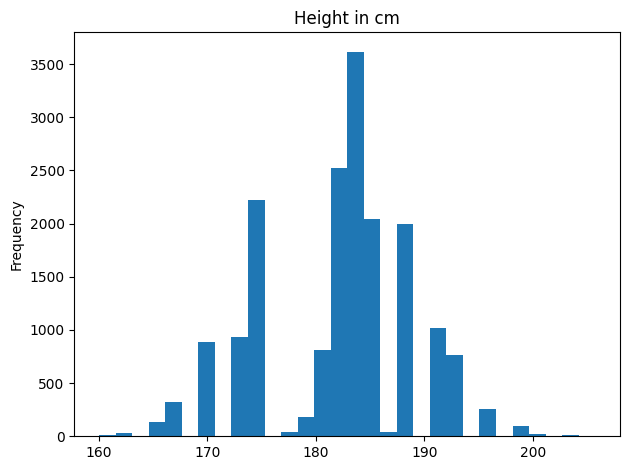

In [54]:
df['height_cm'].plot(kind='hist', bins=30, title='Height in cm')
plt.tight_layout()
plt.show()

# Check duplicated values

In [22]:
df.duplicated().sum()

np.int64(0)

# Object Columns

In [23]:
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols].nunique()

positions         890
nationality       160
preferred_foot      2
body_type          10
dtype: int64

In [24]:
for col in object_cols:
    print(f'{col}: {df[col].unique()}')
    print()

positions: ['CF,RW,ST' 'CAM,RM,CM' 'CM,CAM' 'LW,ST' 'CB' 'RW,ST,RM' 'ST' 'GK'
 'CDM,CM' 'CF,ST' 'RW,ST' 'CAM,RW' 'CDM' 'CM,CDM' 'LB' 'CM,CAM,CDM'
 'CAM,CM,LW' 'CAM,CM,RM' 'LW,ST,LM' 'CAM,CM' 'CAM' 'LW,RW' 'RW,LW' 'CM,LM'
 'CM' 'RM,RW' 'LM,RM,CAM,LW' 'LM' 'RW,RM' 'LM,ST,RM' 'RB' 'LM,RM,LW,RW'
 'LM,CAM,RM' 'RM,LM,ST' 'RW' 'LM,ST,RM,LW' 'CM,CDM,CAM' 'CM,CDM,CB'
 'CB,CDM' 'CF,ST,CAM' 'CDM,CB' 'RB,RWB' 'RM' 'LM,CAM' 'CM,LW' 'LB,LWB,LM'
 'ST,LW' 'LM,LB,CM' 'RB,RM' 'RM,LM,CM' 'LM,RM,CAM' 'RM,RW,ST' 'LW,LM,RW'
 'LB,LM' 'ST,LW,LM' 'RM,CM' 'CM,RM' 'CB,RB' 'RM,RW,LM' 'LM,RM' 'CDM,CB,CM'
 'CAM,CDM' 'LB,CDM' 'CAM,RM,LM' 'RM,CAM,CM' 'LWB' 'CDM,CM,LM' 'CDM,CM,RM'
 'CDM,CM,CB' 'CAM,LW' 'RM,LM' 'ST,CAM' 'LM,CM' 'ST,CF,CAM,LM'
 'LWB,LB,CB,LM' 'RB,LB' 'LW' 'CAM,ST' 'LM,RM,LW' 'LWB,LM,LB'
 'ST,CF,LM,CAM' 'LM,LW,ST' 'LB,LWB' 'RWB,RB,RM' 'ST,RW' 'CAM,CM,LM'
 'RB,RW' 'RM,CAM,LM' 'ST,RM' 'RM,ST' 'CM,LM,RM' 'CM,CAM,LM' 'RW,RWB'
 'LM,RB' 'RM,LM,RW,CAM' 'ST,RM,RWB,LM' 'LB,RB' 'CM,CDM,RM' 'LM,LW'
 'CAM,ST,RM' 'ST

In [25]:
valid_body_types = ['Lean', 'Normal', 'Stocky']
df = df[df['body_type'].isin(valid_body_types)]
df['body_type'].unique()

array(['Lean', 'Normal', 'Stocky'], dtype=object)

In [26]:
df['body_type'].value_counts()

body_type
Normal    10393
Lean       6468
Stocky     1086
Name: count, dtype: int64

In [27]:
df['preferred_foot'].value_counts()

preferred_foot
Right    13778
Left      4169
Name: count, dtype: int64

In [28]:
df['international_reputation(1-5)'].value_counts() # imbalance

international_reputation(1-5)
1    16369
2     1226
3      299
4       50
5        3
Name: count, dtype: int64

In [29]:
# def is_star_player(player):
#     return player['international_reputation(1-5)'] >= 3 or player['value_euro'] >= 1e7 or player['wage_euro'] >= 1e5

# df['is_star_player'] = df.apply(is_star_player, axis=1)

In [30]:
# df['is_star_player'].value_counts()

In [31]:
# df.drop(['international_reputation(1-5)'], axis=1, inplace=True)

In [32]:
original_values = df['preferred_foot'].unique()
new_values = [0, 1]
df['preferred_foot'] = df['preferred_foot'].replace(original_values, new_values)

C:\Users\Admin\AppData\Local\Temp\ipykernel_31640\3948209955.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['preferred_foot'] = df['preferred_foot'].replace(original_values, new_values)


In [33]:
original_values

array(['Right', 'Left'], dtype=object)

In [34]:
df['preferred_foot'].value_counts()

preferred_foot
0    13778
1     4169
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['preferred_foot'] = le.fit_transform(df['preferred_foot'])
df['preferred_foot'].value_counts()

preferred_foot
0    13778
1     4169
Name: count, dtype: int64

In [36]:
df_encoded = pd.get_dummies(df, columns=['body_type'])
df_encoded.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,body_type_Lean,body_type_Normal,body_type_Stocky
id,,,,,,,,,,,,,,,,,,,,,
1,27,177.606642,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,0,...,84,91,67,88,59,57,22,True,False,False
2,25,190.500000,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,0,...,82,88,82,87,63,67,67,False,True,False
3,27,162.560000,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,0,...,83,87,61,83,51,24,22,False,True,False
4,27,187.960000,88.9,CB,Senegal,88,91,60000000.0,135000.0,0,...,24,49,33,80,91,88,87,False,True,False
5,27,193.040000,92.1,CB,Netherlands,88,90,59500000.0,215000.0,0,...,41,60,62,87,90,89,84,False,True,False


In [37]:
df = df_encoded.copy()

In [38]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['positions', 'nationality'], dtype='object')

In [39]:
df['positions'] = df['positions'].str.split(',')
df['positions']

id
1        [CAM, RM, CM]
2            [CM, CAM]
3             [LW, ST]
4                 [CB]
5                 [CB]
             ...      
17949    [RM, CAM, CM]
17950             [LB]
17951             [GK]
17952         [ST, LM]
17953             [ST]
Name: positions, Length: 17947, dtype: object

In [40]:
df_exploded = df.explode('positions')
df_encoded = pd.get_dummies(df_exploded, columns=['positions'])

one_hot_columns = [col for col in df_encoded.columns if col.startswith('positions_')]
df_one_hot_sum = df_encoded[one_hot_columns].groupby('id').sum()
df_final = df.drop(columns=['positions']).join(df_one_hot_sum)

df = df_final

In [41]:
df.head()

,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),...,positions_GK,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST
id,,,,,,,,,,,,,,,,,,,,,
1,27,177.606642,76.2,Denmark,88,89,69500000.0,205000.0,0,3,...,0,0,0,0,0,0,1,0,0,0
2,25,190.500000,83.9,France,88,91,73000000.0,255000.0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,27,162.560000,59.0,Italy,88,88,62000000.0,165000.0,0,3,...,0,0,0,1,0,0,0,0,0,1
4,27,187.960000,88.9,Senegal,88,91,60000000.0,135000.0,0,3,...,0,0,0,0,0,0,0,0,0,0
5,27,193.040000,92.1,Netherlands,88,90,59500000.0,215000.0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# df[['nationality', 'international_reputation(1-5)']].tail(10)

In [43]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['nationality'], dtype='object')

In [44]:
df['nationality'].nunique()

160

In [45]:
df.to_csv('missForest_data.csv', index=False)

In [46]:
df.columns

Index(['age', 'height_cm', 'weight_kgs', 'nationality', 'overall_rating',
       'potential', 'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'release_clause_euro', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'body_type_Lean', 'body_type_Normal',
       'body_type_Stocky', 'positions_CAM', 'positions_CB', 'positions_CDM',
       'positions_CF', 'positions_CM', 'positions_GK', 'positions_LB',
       'positions_LM', 'positions_LW', 'positions_LWB', 'positions_RB',
       'positions_RM', 'positions_RW', 'positi

In [93]:
df['height_cm'].corr(df['weight_kgs'])

np.float64(0.7323939235254102)

In [94]:
# df.corr()